In [43]:
!export GOOGLE_APPLICATION_CREDENTIALS=".../READ/ab2.json"
import os
import numpy as np
import torch
import pandas as pd
from io import StringIO
from google.cloud import storage
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../READ/ab2.json"

from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)

bucket_name = 'inara-debug-4'
gcs_storage_client = storage.Client()
print('Current buckets in the account:')
# List all the available buckets
for bucket in list(gcs_storage_client.list_buckets()):
    print(' ' + bucket.name)
print('Setting root bucket: {} ...'.format(bucket_name))
gcs_bucket = gcs_storage_client.get_bucket(bucket_name)

def read_data_from_blob(blob):
        data_string = blob.download_as_string().decode('utf-8')
        # Creating a torch tensor here from a single blob (csv format)
        return pd.read_csv(StringIO(data_string), delimiter='\t', header=None)

dir = 'train'
file_list = list(gcs_bucket.list_blobs(prefix=dir))
print(file_list[1])

num_inputs = 11515
num_outputs = 11
num_examples = 100



data = read_data_from_blob(file_list[1])
print('size of data from one file:'+str(len(data)))


for i in range(2,int(num_examples/10)+1):
    print('Adding file number '+str(i))
    data = pd.concat([data, read_data_from_blob(file_list[i])])
    
np.array(data).shape


Current buckets in the account:
 artifacts.astrobiology-team-2.appspot.com
 astrobiology-2-data
 astrobiology-papers
 inara
 inara-debug-1
 inara-debug-2
 inara-debug-3
 inara-debug-4
 inara-debug-5
Setting root bucket: inara-debug-4 ...
<Blob: inara-debug-4, train/fdl_009a284c-968f-4774-a23e-c82def0fb937.csv>
size of data from one file:10
Adding file number 2
Adding file number 3
Adding file number 4
Adding file number 5
Adding file number 6
Adding file number 7
Adding file number 8
Adding file number 9
Adding file number 10


In [57]:
x_data = data.iloc[:,39:]
y_data = data.iloc[:,25:36]

In [267]:
y_data


25        26        27        28        29        30        31  \
0   0.056646  0.071008  0.673767  0.124802  0.047581  0.004969  0.000237   
1   0.018051  0.470099  0.367667  0.061701  0.053457  0.003939  0.009818   
2   0.043909  0.305959  0.469687  0.154904  0.000863  0.008000  0.008265   
3   0.080791  0.122344  0.447839  0.201344  0.081565  0.031817  0.000106   
4   0.051578  0.055812  0.309059  0.530522  0.028866  0.010082  0.004048   
5   0.027551  0.350129  0.262242  0.280903  0.052891  0.011910  0.001489   
6   0.004802  0.224493  0.371060  0.320418  0.038055  0.011582  0.012860   
7   0.019144  0.560875  0.154789  0.224106  0.020084  0.012027  0.002273   
8   0.038158  0.151604  0.276992  0.476052  0.009069  0.008930  0.019665   
9   0.001078  0.002062  0.560804  0.420272  0.000568  0.009016  0.000993   
0   0.047887  0.058577  0.212321  0.587042  0.022863  0.023789  0.014654   
1   0.031718  0.231340  0.418139  0.283986  0.017646  0.008173  0.001332   
2   0.054472  0.050666  0.730336  0.091682  0.034094  0.003548  0.009455   
3   0.037915  0.471867  0.289126  0.132095  0.035408  0.002868  0.017313   
4   0.053766  0.009197  0.369363  0.485748  0.062794  0.001415  0.001367   
5   0.067947  0.128736  0.384322  0.281053  0.061184  0.021426  0.020840   
6   0.058943  0.077891  0.503869  0.307254  0.024731  0.006670  0.012562   
7   0.056570  0.023654  0.256338  0.576385  0.057853  0.004337  0.011707   
8   0.004701  0.464617  0.051105  0.411910  0.044630  0.001706  0.010233   
9   0.031450  0.165952  0.423191  0.333884  0.035410  0.002074  0.000408   
0   0.045818  0.397788  0.186968  0.338400  0.014516  0.004847  0.006314   
1   0.016222  0.402131  0.283551  0.241820  0.034046  0.007676  0.003232   
2   0.067185  0.097103  0.463407  0.330015  0.015629  0.007959  0.006982   
3   0.060446  0.111989  0.144039  0.653365  0.002528  0.005430  0.013695   
4   0.027063  0.363411  0.168160  0.390334  0.036103  0.001058  0.008081   
5   0.048915  0.348079  0.374880  0.159388  0.045401  0.004298  0.008509   
6   0.096203  0.604019  0.064547  0.151945  0.026434  0.003130  0.018445   
7   0.024027  0.637836  0.054827  0.152776  0.094544  0.013872  0.006946   
8   0.044688  0.122439  0.350267  0.446952  0.006043  0.002403  0.010496   
9   0.028332  0.244069  0.270424  0.410507  0.022353  0.009758  0.004839   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.043421  0.310838  0.360850  0.258778  0.004267  0.005137  0.006432   
1   0.050356  0.178803  0.509425  0.240638  0.004333  0.006754  0.006527   
2   0.033372  0.060024  0.429152  0.455846  0.004407  0.002117  0.003075   
3   0.111945  0.230062  0.511004  0.018881  0.093343  0.015142  0.001628   
4   0.005566  0.322275  0.431778  0.193976  0.028564  0.007831  0.004947   
5   0.025911  0.125131  0.606762  0.152155  0.063350  0.010909  0.000922   
6   0.047033  0.381134  0.202595  0.311993  0.036266  0.008154  0.009225   
7   0.009136  0.689295  0.213848  0.002944  0.044942  0.015908  0.006185   
8   0.025280  0.199055  0.517611  0.211833  0.020706  0.010704  0.008081   
9   0.058445  0.556115  0.084923  0.243548  0.041853  0.006434  0.006481   
0   0.052699  0.425843  0.050202  0.394937  0.044812  0.007775  0.011885   
1   0.041363  0.137052  0.479970  0.312540  0.013113  0.000321  0.003742   
2   0.006628  0.050286  0.597632  0.302679  0.011095  0.008758  0.012847   
3   0.045544  0.292224  0.590951  0.013099  0.028208  0.005803  0.010765   
4   0.057988  0.248533  0.426800  0.196122  0.054924  0.001429  0.006546   
5   0.020445  0.442008  0.396340  0.115872  0.012062  0.008023  0.000590   
6   0.056589  0.098290  0.548582  0.209574  0.064790  0.007839  0.002203   
7   0.028485  0.359499  0.512783  0.049422  0.018008  0.001620  0.013061   
8   0.027361  0.390929  0.295988  0.229978  0.038873  0.004054  0.001131   
9   0.018758  0.574623  0.032401  0.309943  0.039744  0.005655  0.012708   
0   0.001178  0.228017  0.332756  0.357790  0.052752  0.00

In [100]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [372]:
# Parameters
learning_rate = 0.001
training_epochs = 100
display_step = 50

In [183]:
train_X=x_data.T

In [268]:
train_Y=np.array(y_data).T

In [269]:
train_Y.shape

(11, 100)

In [270]:
n_samples = train_X.shape[0]

In [313]:
# tf Graph Input
#X = tf.placeholder(tf.float32,shape=(11515,None))
#Y = tf.placeholder(tf.float32,shape=(11,None))

X = tf.placeholder(tf.float32,shape=(None,11515))
Y = tf.placeholder(tf.float32,shape=(None,11))

In [314]:
rng.randn(11,11515)

array([[-8.48145359e-01, -4.99798816e-01, -1.38495809e-01, ...,
         7.93891562e-01, -1.47336116e+00,  1.02772863e+00],
       [-2.90908165e-01, -2.28168903e-01,  1.69402966e+00, ...,
         1.37416549e+00, -5.17984262e-01, -5.36819808e-01],
       [ 1.25696108e+00, -7.64479171e-01,  3.34264691e-01, ...,
        -1.07892411e+00,  6.04071433e-01,  6.50289363e-01],
       ...,
       [-9.91426602e-01, -1.21785584e+00,  8.10201703e-01, ...,
         5.09264145e-01,  1.81341362e-01, -4.07909204e-02],
       [ 6.83604248e-01, -7.88140636e-01,  1.27214775e+00, ...,
         3.47241192e-01,  2.36880115e-01,  1.14749777e+00],
       [-2.02665200e+00,  1.72047708e-01, -6.91370449e-01, ...,
        -4.20806943e-04,  6.05563677e-01,  3.18069042e-01]])

In [329]:
# Set model weights
#W = tf.cast(tf.Variable(rng.randn(11,11515), name="weight"),tf.float32)
#b =  tf.cast(tf.Variable(tf.float32,rng.randn(11,), name="bias"),tf.float32)

In [319]:
W = tf.Variable(tf.ones([11515,11]), name="weight")
b = tf.Variable(tf.ones([1,11]), name="bias")

In [296]:
W

<tf.Tensor 'Cast_15:0' shape=(11, 11515) dtype=float32>

In [297]:
X

<tf.Tensor 'Placeholder_28:0' shape=(11515, ?) dtype=float32>

In [322]:
# Construct a linear model
init = tf.initialize_all_variables()
pred = tf.add(tf.matmul(X,W), b)


In [366]:
# Mean squared error
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

cost = tf.reduce_mean(tf.square(pred-Y))

In [381]:
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [382]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [383]:
W

<tf.Variable 'weight_20:0' shape=(11515, 11) dtype=float32_ref>

In [390]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    cost_history = []
    #training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    for epoch in range(100):
        sess.run(training_step,feed_dict={X:train_X.T,Y:train_Y.T})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_X.T,Y: train_Y.T}))
        Wnp = sess.run(W,feed_dict={X:train_X.T,Y:train_Y.T})

In [391]:
cost_history

array([7.45630000e+06, 1.67394725e+06, 3.75805031e+05, 8.43711641e+04,
       1.89440605e+04, 4.25562158e+03, 9.58047485e+02, 2.17730392e+02,
       5.15191574e+01, 1.41951056e+01, 5.80634832e+00, 3.91362000e+00,
       3.47928905e+00, 3.37240291e+00, 3.33906221e+00, 3.32226706e+00,
       3.30922055e+00, 3.29704785e+00, 3.28510642e+00, 3.27324939e+00,
       3.26144409e+00, 3.24968529e+00, 3.23796821e+00, 3.22629476e+00,
       3.21466327e+00, 3.20307469e+00, 3.19152761e+00, 3.18002248e+00,
       3.16855860e+00, 3.15713716e+00, 3.14575601e+00, 3.13441753e+00,
       3.12311935e+00, 3.11186290e+00, 3.10064673e+00, 3.08947110e+00,
       3.07833648e+00, 3.06724238e+00, 3.05618787e+00, 3.04517388e+00,
       3.03420019e+00, 3.02326560e+00, 3.01237130e+00, 3.00151587e+00,
       2.99070048e+00, 2.97992396e+00, 2.96918654e+00, 2.95848799e+00,
       2.94782805e+00, 2.93720770e+00, 2.92662501e+00, 2.91608143e+00,
       2.90557528e+00, 2.89510798e+00, 2.88467789e+00, 2.87428617e+00,
      

In [393]:
Wnp.shape

(11515, 11)

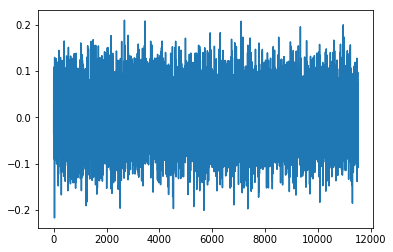

In [396]:
plt.plot(Wnp[:,0])

In [378]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    cost_history = []
    p = sess.run(pred,feed_dict={X:train_X.T,Y:train_Y.T})
    hi = sess.run(cost,feed_dict={X:train_X.T,Y:train_Y.T})


In [379]:
np.mean((p - train_Y.T),0)

array([5763.02504478, 5762.74614072, 5762.73917807, 5762.7900146 ,
       5763.02863944, 5763.05323139, 5763.0534888 , 5763.05890969,
       5763.05331391, 5763.05733375, 5763.06043968])

In [380]:
hi

33212800.0

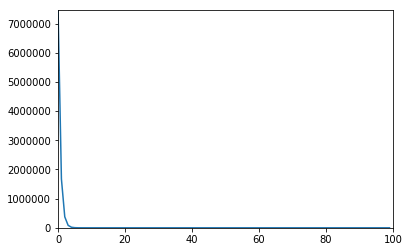

In [389]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

In [311]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X.T, train_Y.T):
            c = sess.run(optimizer, feed_dict={X: np.reshape(x,(-1,1)), Y: np.reshape(y,(-1,1))})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
        #    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y.T})
            print("Epoch:", '%04d' % (epoch+1), "cost=",c,"W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= None W= [[-0.88949996  0.15602314 -0.9720316  ... -0.7393819  -0.5505407
  -1.2602834 ]
 [-1.1369734  -0.15772462 -1.4405868  ... -0.21285924  2.0182767
  -0.73729753]
 [-0.8497882   0.34702528  0.7836758  ...  0.21954808 -0.90354633
   0.8643635 ]
 ...
 [-0.7790829  -0.69203955 -0.17922285 ... -1.3666131  -0.02495902
   0.5017131 ]
 [ 0.13756403  0.08755859  1.5248672  ... -1.9750472  -0.2980411
   0.8528529 ]
 [-0.7436653   1.3694187  -1.2677028  ... -0.25214732  0.03445301
  -1.6184103 ]] b= [ 0.7759813   2.178566   -0.42871618 -0.87182707  1.8006996   0.6720868
  1.0173655  -0.9140745  -1.3372009   0.28480843 -0.74160594]
Epoch: 0100 cost= None W= [[-0.86977625  0.15321241 -0.9662086  ... -0.73243046 -0.5281695
  -1.3033035 ]
 [-1.1592975  -0.14459895 -1.439123   ... -0.20217915  2.0057364
  -0.7306457 ]
 [-0.8473846   0.34129167  0.8011315  ...  0.21560389 -0.86594015
   0.8426992 ]
 ...
 [-0.77771354 -0.6653114  -0.18764529 ... -1.3489166  -0.02330032
   0.52412

InvalidArgumentError: Incompatible shapes: [11,100] vs. [11]
	 [[Node: Add_10 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](MatMul_12, Cast_16)]]

Caused by op 'Add_10', defined at:
  File "/home/szorzan-admin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-298-8d2a4f45cce2>", line 2, in <module>
    pred = tf.add(tf.matmul(W, X), b)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 297, in add
    "Add", x=x, y=y, name=name)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/szorzan-admin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [11,100] vs. [11]
	 [[Node: Add_10 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](MatMul_12, Cast_16)]]


In [283]:
for y in train_Y:
    print(y.shape)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


In [312]:
 training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

RuntimeError: Attempted to use a closed Session.